Proszę pobrać plik rye.txt, zawierający zebrane dane o próbkach zboża. W dwóch pierwszych kolumnach znajdują się dwie właściwości fizykochemiczne zboża, w trzeciej - informacja o rodzaju gleby, na której zboże rosło (1, 2 lub 3). Dane nie są znormalizowane. Proszę znormalizować dane, podzielić je na zbiór uczący i testujący w proporcjach 80-20 (należy pamiętać o proporcjach klas!), zaproponować wielowarstwową sieć neuronową i zbadać jej skuteczność dla różnych ilości warstw i neuronów w tych warstwach. Proszę narysować w jaki sposób sieć dokonała podziału w zbiorze dla kilku sieci (zarówno tych z dobrymi, jak i złymi wynikami) oraz jak wygląda poprawny podział zbioru. Proszę również przedstawić wyniki dla 5-8 różnych struktur sieci, wraz z oceną, która z nich najlepiej poradziła sobie z zadaniem klasyfikacji.

Konfiguracja: (10,), Skuteczność: 80.42%


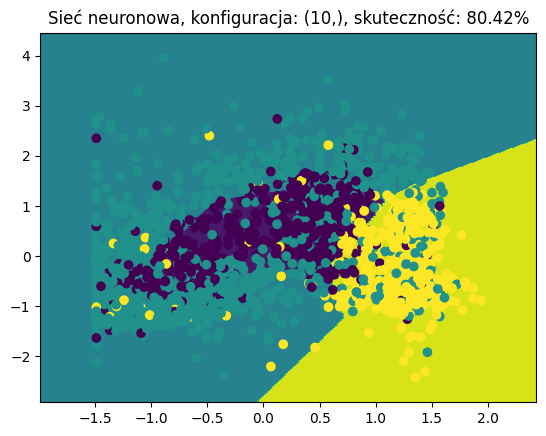

Konfiguracja: (20,), Skuteczność: 82.31%


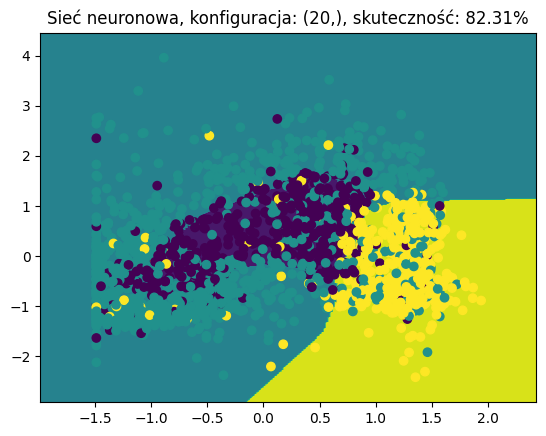

Konfiguracja: (10, 10), Skuteczność: 83.73%


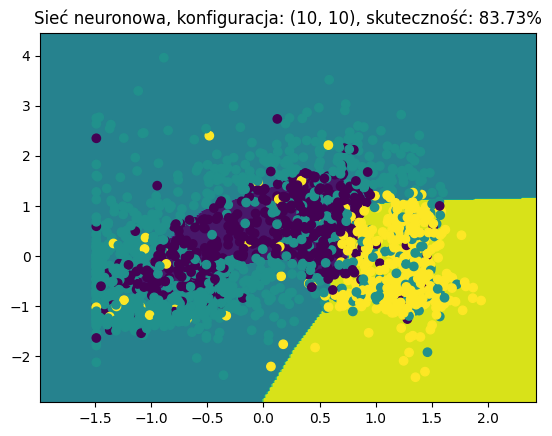

Konfiguracja: (20, 20), Skuteczność: 83.96%


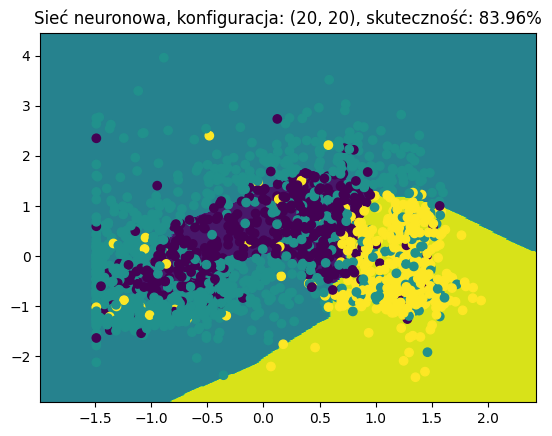

Konfiguracja: (10, 10, 10), Skuteczność: 83.25%


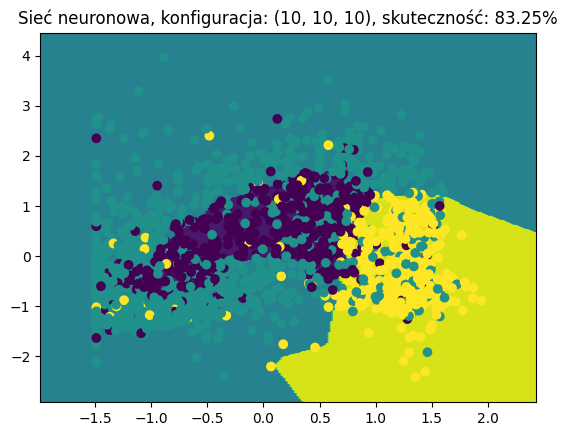

Konfiguracja: (20, 20, 20), Skuteczność: 83.25%


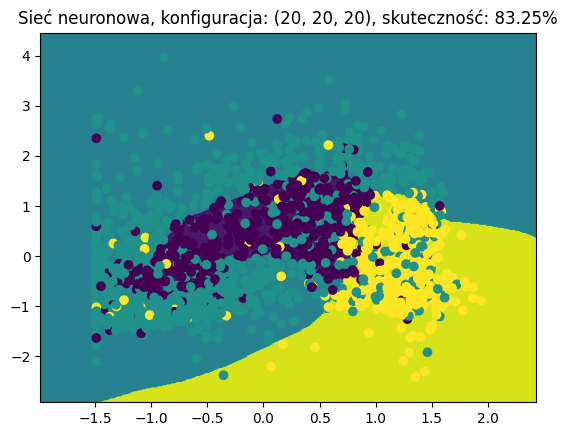

Konfiguracja: (10, 10, 10, 10), Skuteczność: 84.43%


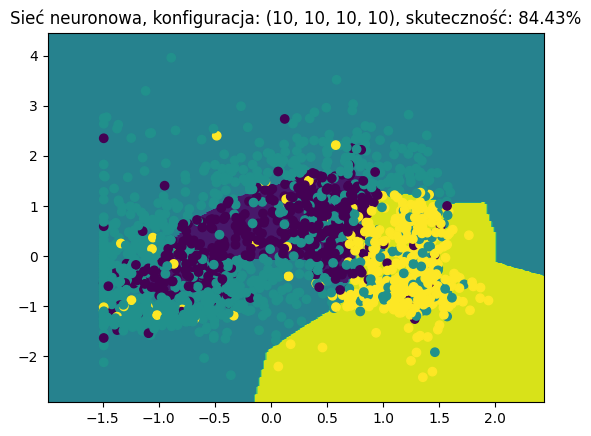

Konfiguracja: (20, 20, 20, 20), Skuteczność: 84.91%


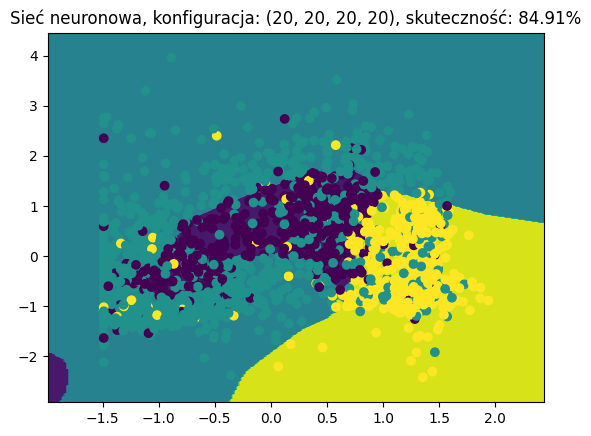

Konfiguracja: (20, 20, 20, 20, 20), Skuteczność: 83.25%


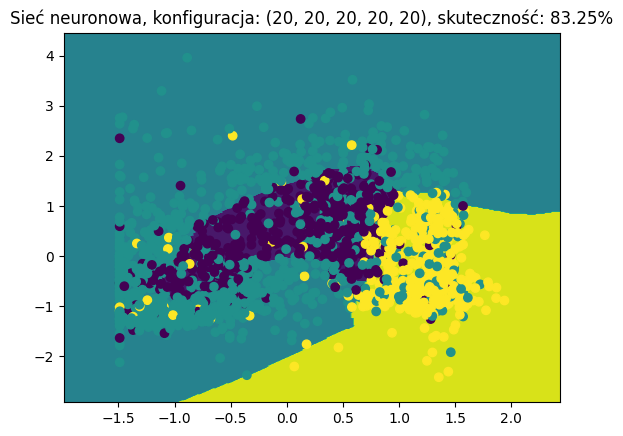

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

data = pd.read_csv('rye.txt', sep=',')
scaler = StandardScaler()
data[['Property A', 'Property B']] = scaler.fit_transform(data[['Property A', 'Property B']])
X = data[['Property A', 'Property B']]
y = data['Soil Type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)
configs = [(10,), (20,), (10, 10), (20, 20), (10, 10, 10), (20, 20, 20), (10, 10, 10, 10), (20, 20, 20, 20), (20, 20, 20, 20, 20)]
for config in configs:
    mlp = MLPClassifier(hidden_layer_sizes=config, random_state=1, max_iter=1000)
    mlp.fit(X_train, y_train)
    predictions = mlp.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    print(f"Konfiguracja: {config}, Skuteczność: {accuracy * 100:.2f}%")
    x_min, x_max = X['Property A'].min() - 0.5, X['Property A'].max() + 0.5
    y_min, y_max = X['Property B'].min() - 0.5, X['Property B'].max() + 0.5
    h = 0.02
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = mlp.predict(pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=X_train.columns))
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.contourf(xx, yy, Z)
    plt.scatter(X['Property A'], X['Property B'], c=y)
    plt.title(f'Sieć neuronowa, konfiguracja: {config}, skuteczność: {accuracy * 100:.2f}%')
    plt.show()

**Wnioski:**
Dzięki normalizacji, wszystkie cechy mają tę samą skalę, co ułatwia proces uczenia sieci neuronowej.
Najlepszą skuteczność osiągnęła sieć z konfiguracją (20, 20, 20, 20).
Dla tych danych, sieć lepiej uczy się z mniejszą ilością warstw z mniejszą ilością neuronów, niż z większą ilościa warstw i mniejszą ilością neuronów na każdą z nich.
Sieci z większą liczbą warstw i neuronów były w stanie dokonać bardziej skomplikowanego podziału, co prawdopodobnie przyczyniło się do ich wyższej skuteczności.
Sieć (20,20,20,20,20) najprawdopodobniej doświadczyła overfittingu, stąd niższa skuteczność.

Proszę pobrać zbiór ręcznie pisanych cyfr z https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits (można to zrobić funkcją datasets.load_digits() w sklearnie). Proszę sprawdzić skuteczność klasyfikacji na tym zbiorze za pomocą wielowarstwowej sieci neuronowej.

In [41]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

digits = datasets.load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=1)
mlp = MLPClassifier(hidden_layer_sizes=(100,50), max_iter=1000, random_state=1)
mlp.fit(X_train, y_train)
predictions = mlp.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Skuteczność: {accuracy * 100:.2f}%")

Skuteczność: 97.22%


**Wnioski:**
Wynik dokładności bliski 100% wskazuje, że model praktycznie idealnie klasyfikuje cyfry na podstawie danych wejściowych. Model prawidłowo nauczył się wzorców w danych treningowych i skutecznie za ich pomocą klasyfikuje dane testowe.


Proszę sprawdzić, jak zmieni się poprawność klasyfikacji na zbiorze ręcznie pisanych cyfr dla różnych architektur sieci, funkcji aktywacji, ilości epok uczenia i algorytmów uczenia. Lepsza jest mała ilość dużych warstw, czy duża ilość małych? Proszę zbadać wpływ współczynnika uczenia (learning_rate) podczas używania algorytmu SGD. Dla najciekawszych przykładów proszę wypisać macierze pomyłek.

In [40]:
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

digits = datasets.load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=1)
parameters = [
    {'hidden_layer_sizes': (30,30,30), 'solver': 'adam', 'max_iter': 1000},
    {'hidden_layer_sizes': (30,30,30), 'solver': 'sgd', 'max_iter': 1000, 'learning_rate_init': 0.01},
    {'hidden_layer_sizes': (30,30,30), 'solver': 'sgd', 'max_iter': 1000, 'learning_rate_init': 0.1},
    {'hidden_layer_sizes': (10,10,10,10), 'solver': 'adam', 'max_iter': 1000},
    {'hidden_layer_sizes': (10,10,10,10), 'solver': 'adam', 'max_iter': 10000},
    {'hidden_layer_sizes': (40,), 'solver': 'adam', 'max_iter': 1000},
    {'hidden_layer_sizes': (40,), 'solver': 'adam', 'max_iter': 10000},
]
for params in parameters:
    mlp = MLPClassifier(**params, random_state=1)
    mlp.fit(X_train, y_train)
    predictions = mlp.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    print(f"Parametry: {params}")
    print(f"Skuteczność: {accuracy * 100:.2f}%")
    print("Macierz pomyłek:")
    print(confusion_matrix(y_test, predictions))
    print("\n")

Parametry: {'hidden_layer_sizes': (30, 30, 30), 'solver': 'adam', 'max_iter': 1000}
Skuteczność: 96.39%
Macierz pomyłek:
[[42  0  0  0  1  0  0  0  0  0]
 [ 0 33  0  0  0  0  0  0  1  1]
 [ 0  0 35  0  0  0  0  1  0  0]
 [ 0  0  0 41  0  0  0  0  0  0]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  0  0  1  0 29  0  0  0  0]
 [ 0  0  0  0  0  0 37  0  0  0]
 [ 0  0  0  0  1  0  0 34  0  2]
 [ 0  1  0  1  0  2  0  0 25  0]
 [ 0  0  0  1  0  0  0  0  0 33]]


Parametry: {'hidden_layer_sizes': (30, 30, 30), 'solver': 'sgd', 'max_iter': 1000, 'learning_rate_init': 0.01}
Skuteczność: 96.11%
Macierz pomyłek:
[[40  0  0  0  0  1  2  0  0  0]
 [ 0 34  1  0  0  0  0  0  0  0]
 [ 0  0 35  1  0  0  0  0  0  0]
 [ 0  0  1 40  0  0  0  0  0  0]
 [ 0  0  0  0 37  0  1  0  0  0]
 [ 0  0  0  0  0 29  0  1  0  0]
 [ 0  0  0  0  0  0 37  0  0  0]
 [ 0  0  0  0  1  1  0 34  1  0]
 [ 0  0  0  0  0  1  0  0 28  0]
 [ 0  0  0  0  0  1  0  1  0 32]]


Parametry: {'hidden_layer_sizes': (30, 30, 30), 'solver': 'sgd', 

**Wnioski:**
Dokładność klasyfikacji ręcznie pisanych cyfr zwiększa się wraz ze zwiększaniem liczby warstw i neuronów w sieci neuronowej. Najlepsze wyniki uzyskano dla konfiguracji (50,50).
Wpływ współczynnika uczenia (learning_rate) podczas używania algorytmu SGD jest również widoczny. Dla learning_rate = 0.01 i learning_rate = 0.1, dokładność wynosiła odpowiednio 96.11% i 9.72%.
Algorytm uczenia Adam okazał się lepszy dla tych samych danych niż SGD przy learning_rate 0.01
W teście dla algorytmu Adam, lepiej było użyć jednej warstwy z większą ilością neuronów, niż wielu warstw z mniejszą ich ilością.


Proszę pobrać zbiór yeast z UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/Yeast). Proszę we własnym zakresie dokonać wstępnej analizy i przygotowania tego zbioru. Warto zauważyć, że liczności różnych klas wewnątrz zbioru są _bardzo_ nierówne. Proszę spróbować osiągnąć jak najlepsze wyniki i narysować dla nich macierz pomyłek (dla zbioru uczącego i testującego). Czy trafność na poziomie 0.5 dla takiego zbioru jest dobra? Mogą państwo zbadać też czas wykonywania funkcji fit dla różnych konfiguracji sieci.

In [39]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import time

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/yeast/yeast.data"
names = ['Sequence Name', 'Col1', 'Col2', 'Col3', 'Col4', 'Col5', 'Col6', 'Col7', 'Col8', 'Class']
data = pd.read_csv(url, names=names, delim_whitespace=True)
le = preprocessing.LabelEncoder()
data['Class'] = le.fit_transform(data['Class'])
X = data.drop(['Sequence Name', 'Class'], axis=1)
y = data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
configs = [(50,), (100,), (200,), (50, 50), (100, 100)]
for config in configs:
    mlp = MLPClassifier(hidden_layer_sizes=config, max_iter=10000, random_state=1)
    start_time = time.time()
    mlp.fit(X_train, y_train)
    end_time = time.time()
    predictions = mlp.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    print(f"Konfiguracja: {config}")
    print(f"Czas trenowania: {end_time - start_time:.2f}s")
    print(f"Skuteczność: {accuracy * 100:.2f}%")
    print("Macierz pomyłek:")
    print(confusion_matrix(y_test, predictions))
    print("Macierz pomyłek dla zbioru treningowego:")
    print(confusion_matrix(y_train, mlp.predict(X_train)))
    print("\n")

Konfiguracja: (50,)
Czas trenowania: 2.98s
Skuteczność: 58.59%
Macierz pomyłek:
[[56  0  0  0  1  0  8 23  0  0]
 [ 0  1  0  0  0  0  0  0  0  0]
 [ 1  0  3  2  1  0  1  1  0  0]
 [ 0  0  1 10  1  1  0  0  0  0]
 [ 1  0  0  0  4  3  0  1  0  0]
 [ 3  0  0  0  0 29  0  3  0  0]
 [11  0  0  0  1  4 26  6  1  0]
 [30  0  0  0  0  6  7 43  0  0]
 [ 1  0  0  0  1  0  1  0  2  0]
 [ 2  0  0  0  0  0  0  0  0  0]]
Macierz pomyłek dla zbioru treningowego:
[[250   0   0   0   1   3  33  87   1   0]
 [  0   4   0   0   0   0   0   0   0   0]
 [  3   0  18   1   2   0   2   0   0   0]
 [  0   0   1  23   5   1   1   0   0   0]
 [  5   0   4   5  18   4   4   2   0   0]
 [  7   0   0   0   2 110   1   8   0   0]
 [ 53   0   0   1   6   5 121   8   1   0]
 [117   0   2   0   3  12  16 193   0   0]
 [  5   0   0   0   0   0   2   0   8   0]
 [ 13   0   2   0   1   7   2   3   0   0]]


Konfiguracja: (100,)
Czas trenowania: 4.27s
Skuteczność: 60.27%
Macierz pomyłek:
[[59  0  0  0  1  0  5 23  0  0]
 

**Wnioski:**
Analizując macierze pomyłek, widzimy, że model ma trudności z niektórymi klasami. Na przykład, model często mylnie klasyfikuje klasę '1' jako '7'.
Nierównomierność liczności różnych klas w zbiorze danych jest prawdopodobnie jednym z czynników wpływających na te trudności. 
Model osiąga lepsze wyniki na zbiorze treningowym niż na zbiorze testowym. Może to wskazywać na overfitting, czyli zbyt mocne dopasowanie modelu do danych treningowych kosztem jego zdolności do generalizacji na nowe dane.
Różne konfiguracje dają wyniki bliskie ~60%, co wskazuje że większe konfiguracje sieci nie wpływają znacząco w tym przypadku na wynik.